In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
wine = load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [6]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [9]:
len(y_test)

45

In [10]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
lda = LinearDiscriminantAnalysis()

In [12]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [13]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0])

In [14]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [15]:
result

,0,1
0,2,2
1,0,0
2,0,0
3,0,0
4,0,0
5,2,2
6,1,1
7,0,0
8,2,2
9,1,1


In [16]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test, lda.predict(X_test))

0.9555555555555556

In [18]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 3.56989802e+00, -1.09166322e-01,  8.91800272e+00,
        -9.65889105e-01, -1.19889789e-02, -3.14296735e+00,
         5.51157748e+00,  5.79378836e-01, -1.17711987e+00,
        -7.21324644e-01,  4.80811294e+00,  3.86551906e+00,
         1.63181281e-02],
       [-2.08827647e+00, -7.44163341e-01, -5.41025341e+00,
         3.35412445e-01,  1.19147613e-02, -2.66110038e-01,
         1.65702441e+00,  8.39399446e-01,  3.32061676e-01,
        -8.02205025e-01,  1.79781612e+00, -4.80905649e-01,
        -5.70735443e-03],
       [-2.95986763e-01,  1.39423202e+00, -4.07682828e-01,
         4.73686838e-01, -7.40869942e-03,  3.86855319e+00,
        -8.82461167e+00, -2.06801036e+00,  7.08767270e-01,
         2.15836109e+00, -8.30220740e+00, -3.37243958e+00,
        -7.93278860e-03]])

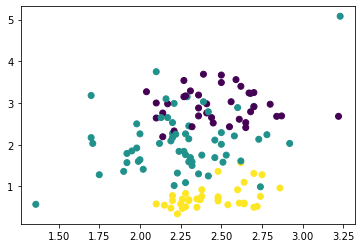

In [19]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['ash'], X_train['flavanoids'], c=y_train)
plt.show()

In [20]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['ash', 'flavanoids']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['ash', 'flavanoids']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

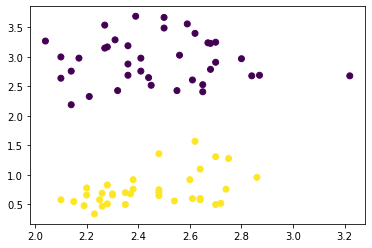

In [21]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
plt.show()

In [22]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [23]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.47157895, 2.93894737],
       [2.44314286, 0.74542857]])

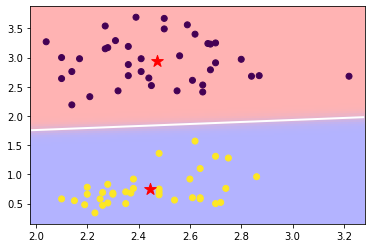

In [24]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [25]:
# второй признак в 16 раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[  3.2342266 , -18.78333641]])

In [26]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [27]:
data[['flavanoids', 'ash']].corr()

,flavanoids,ash
flavanoids,1.000000,0.115077
ash,0.115077,1.000000


In [28]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая переменная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [31]:
lr.predict(small_test)

array([2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0])

In [32]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [33]:
lr.coef_

array([[ 0.13920754, -3.03492482]])

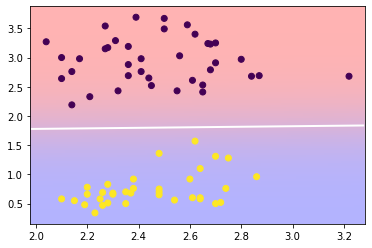

In [34]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

## Кластеризация

In [50]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_moons, make_blobs

In [51]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [82]:
X

array([[-8.92543245e+00, -1.39132477e+00],
       [-4.57215610e+00,  8.59659873e+00],
       [-1.32916013e+01, -2.95039828e+00],
       [-1.14064752e+01, -6.19788937e+00],
       [-3.54767489e+00,  8.61472296e+00],
       [ 1.31219093e+00,  8.28216825e+00],
       [-4.13713770e-01,  8.10983250e+00],
       [-1.64354919e+00,  7.76601170e+00],
       [-3.78529940e-01,  7.46511520e+00],
       [-1.58683259e+00,  1.11577533e+01],
       [-8.67608809e+00,  1.60086533e-01],
       [ 4.86882077e-01,  7.70400760e+00],
       [-1.22395396e+01, -3.90015152e+00],
       [-1.07701092e-02,  8.81729240e+00],
       [-1.11094414e+01, -2.22310853e+00],
       [-1.29618845e+01, -4.00853679e+00],
       [-4.41215862e+00,  1.04799512e+01],
       [-1.19137850e+01, -2.93793054e+00],
       [-1.89400488e+00,  2.77140064e+00],
       [ 3.20966636e+00,  8.70606210e+00],
       [-7.88626032e+00, -1.22824066e+00],
       [ 7.76342505e-01,  8.05431493e+00],
       [-2.70199804e+00,  1.11086844e+01],
       [-8.

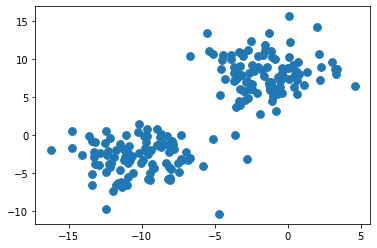

In [54]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [56]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [58]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.63673125, -0.6675741 ],
       [ 0.24830257,  0.98893937],
       [-1.52438616, -0.92614899],
       [-1.1411345 , -1.4647507 ],
       [ 0.4565826 ,  0.9919453 ],
       [ 1.44460755,  0.93679056],
       [ 1.09372607,  0.90820839],
       [ 0.84369693,  0.85118515],
       [ 1.10087904,  0.80128097],
       [ 0.85522758,  1.41371104],
       [-0.58603881, -0.41026999],
       [ 1.27681984,  0.84090167],
       [-1.31049893, -1.08366712],
       [ 1.17564569,  1.02554177],
       [-1.08074666, -0.8055268 ],
       [-1.45735375, -1.101643  ],
       [ 0.28083053,  1.30129645],
       [-1.24427206, -0.9240812 ],
       [ 0.79277855,  0.02282073],
       [ 1.83036985,  1.00709404],
       [-0.42546451, -0.64052633],
       [ 1.33566799,  0.89900071],
       [ 0.62851118,  1.40557288],
       [-0.47023507, -1.14758404],
       [-1.09097837, -0.91432066],
       [-0.76539726, -1.40452404],
       [ 0.59104258,  0.7213713 ],
       [ 0.60736755,  0.72755132],
       [-0.79216197,

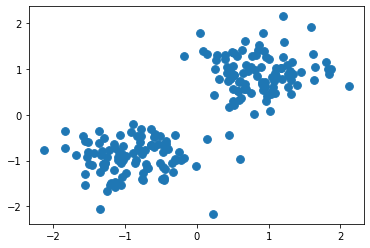

In [60]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [63]:
from sklearn.cluster import KMeans

In [64]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0])

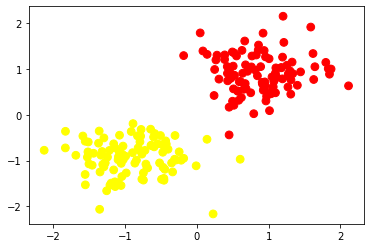

In [66]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [67]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

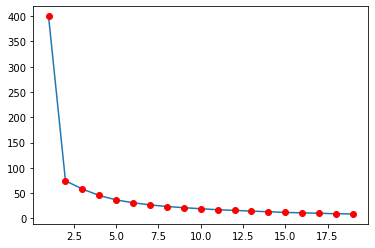

In [69]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Иерархическая кластеризация

In [70]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

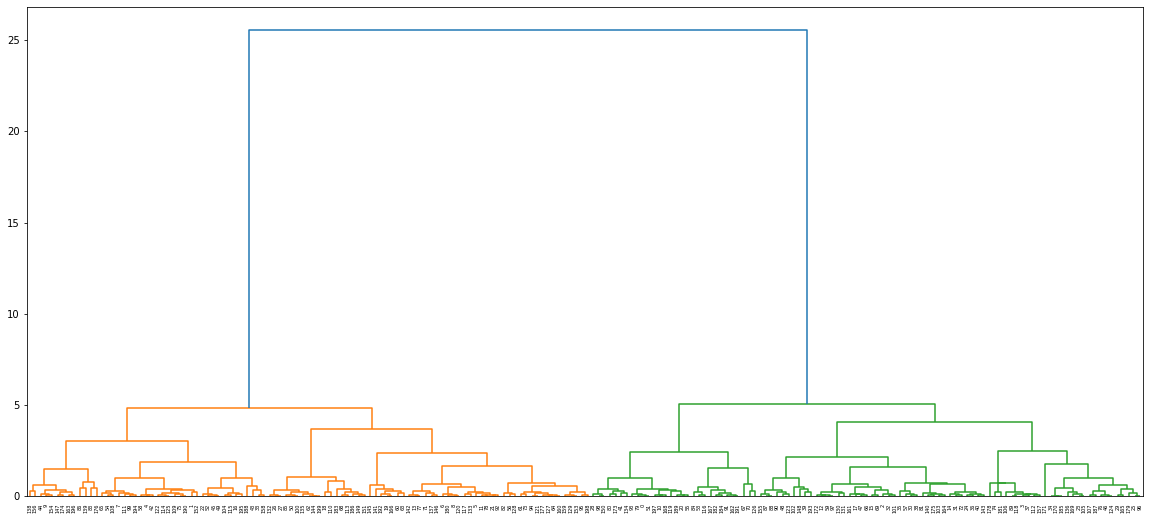

In [71]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [76]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [78]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1], dtype=int64)

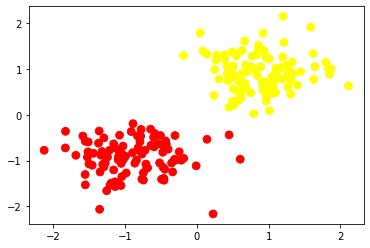

In [79]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [80]:
df = pd.DataFrame(X)
df['y_hat'] = clusters
df

,0,1,y_hat
0,-8.925432,-1.391325,0
1,-4.572156,8.596599,1
2,-13.291601,-2.950398,0
3,-11.406475,-6.197889,0
4,-3.547675,8.614723,1
...,...,...,...
195,-4.485922,9.848132,1
196,-1.721516,10.501848,1
197,-8.283088,-0.101231,0
198,-1.058964,4.454746,1
